In [1]:
from lcapy import *
from numpy import logspace
from numpy import linspace
 

## Q2
The following transfer function is out of control:$\frac{7s^2}{s^2-11s-3}$

Explain why the system is out of control, and describe what the shape of the step response would be.
Write out the transfer function Q(s) of a system with one negative feedback loop with a feedback transfer function of G(s).
Design the simplest feedback transfer function G(s) to make Q(s) stable.
What are the conditions on the constants of G(s) that will ensure that the system is in control?


In [2]:
H = transfer(7*s**2 / (s**2-11*s-3))
H

        2    
     7⋅s     
─────────────
 2           
s  - 11⋅s - 3

In [3]:
H.poles()

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

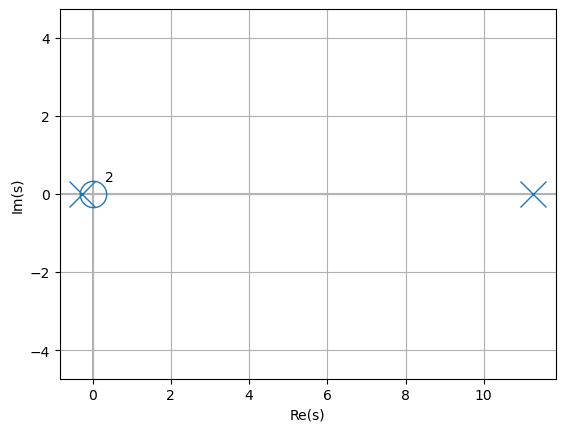

In [4]:
H.plot()

There is a pole at $\frac{11}{2}+\sqrt{\frac{133}{4}}$ which is on the RHP so we will get exponential growth.

In [5]:
F=H*1/s
ft=F(t)
ft
# The equation is:

  ⎛                      ⎛11   √133⎞                       ⎛11   √133⎞⎞     
  ⎜                    t⋅⎜── - ────⎟                     t⋅⎜── + ────⎟⎟     
  ⎜       ⎛11   √133⎞    ⎝2     2  ⎠        ⎛11   √133⎞    ⎝2     2  ⎠⎟     
  ⎜  √133⋅⎜── - ────⎟⋅ℯ                √133⋅⎜── + ────⎟⋅ℯ             ⎟     
  ⎜       ⎝2     2  ⎠                       ⎝2     2  ⎠               ⎟     
7⋅⎜- ─────────────────────────────── + ───────────────────────────────⎟⋅u(t)
  ⎝                133                               133              ⎠     

You did not have to find the equation, you just had to say exponetial growth.  

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

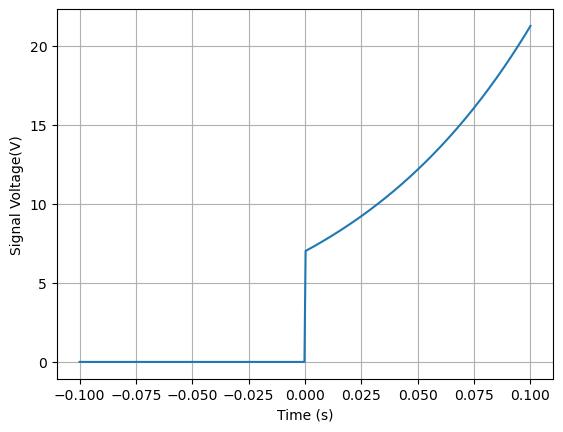

In [6]:
tv = linspace(-.1, .1, 400)
ft.plot(tv,ylabel='Signal Voltage(V)')

We can see the exponential growth clearly.

Below is the block diagram of Q(s):

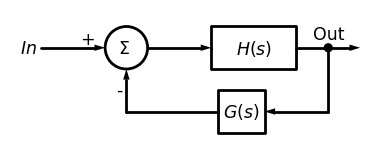

In [7]:
import schemdraw as schem
import schemdraw.elements as e
from schemdraw import dsp 
d = schem.Drawing()
a1=d.add(dsp.Arrow(l=d.unit/2).label('+', loc='right',ofst=(-.6, .2)).label('$In$', loc='left'))
sm = d.add(dsp.SumSigma())
a2=d.add(dsp.Arrow(l=d.unit/2))
delay1 = d.add(dsp.Box(w=2, h=1, label='$H(s)$', anchor='W'))
a3=d.add(dsp.Arrow('right', l=d.unit/2, xy=delay1.E,label='Out'))
#a4=d.add(dsp.Arrow(xy=sm.S, theta=-90,l=d.unit/2,reverse=True).label('-', loc='right',ofst=(.6, .2)))
d.add(dsp.Dot(xy=a3.center))
l1=d.add(dsp.Line('down', xy=a3.center, l=.5*d.unit))
l2=d.add(dsp.Arrow('left', l=.5*d.unit))
g2 = d.add(dsp.Box(w=1.1, h=1, label='$G(s)$', anchor='E'))
l3=d.add(dsp.Line('left', tox=sm.S, xy=g2.W))
l4=d.add(dsp.Arrow('up', toy=sm.S,label='-'))
d.draw()

In [8]:
from sympy import Symbol
#Keep G a symbol for now.
K1=Symbol('K1')
K2=Symbol('K2')
G = Symbol('G')
N=s**2*7
D=s**2-11*s-3
Q=N/(D+G*N)
Q.general()

             2         
          7⋅s          
───────────────────────
 2                     
s ⋅(7⋅G + 1) - 11⋅s - 3

We need to as a $bs$ term and change $-3$ into a positive term. We need a $\frac{K_1}{s}$ term that modifies $7s^2$ into a $bs$ term.  We need a $\frac{K_2}{s^2}$ term that modifies $7s^2$ into a positive term when summed with -3.

$$G(s)=\frac{K_1}{s}+\frac{K_2}{s^2}$$

In [9]:
Q=Q.subs(G,K1/s+K2/s**2)
Q=Q.expand()
Q

                2            
             7⋅s             
─────────────────────────────
                 2           
7⋅K₁⋅s + 7⋅K₂ + s  - 11⋅s - 3

To make $7 K_1-11 $ positve $K_1>\frac{11}{7}$

To make $7 K_2- 3$ positive $K_2>\frac{3}{7}$
For example $K_2=\frac{6}{7}$, $K_1=\frac{22}{7}$

In [10]:
Q=Q.subs(K1,22/7)
Q=Q.subs(K2,44/7)

Q

                       2                    
                    7⋅s                     
────────────────────────────────────────────
 2   11000000000000001⋅s   20500000000000001
s  + ─────────────────── + ─────────────────
       1000000000000000     500000000000000 

In [11]:
Q.poles()

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

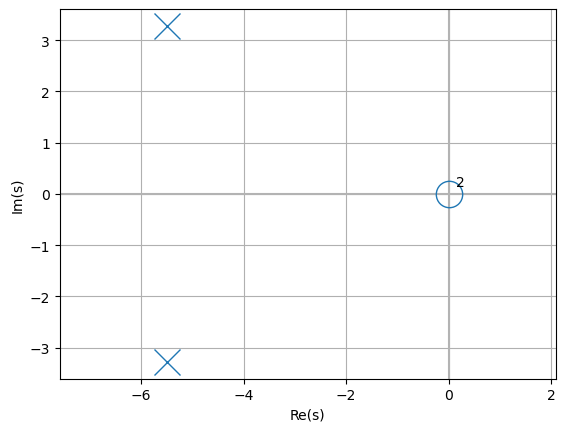

In [12]:
Q.plot()

We can see the poles are now on the RHP.

In [13]:
Fq=Q*1/s
qt=Fq(t,causal=True)
qt

  ⎛                                                       -11000000000000001⋅t
  ⎜                                                       ────────────────────
  ⎜                                                          2000000000000000 
  ⎜  11000000000000001⋅√42999999999999985999999999999999⋅ℯ                    
  ⎜                                                                           
7⋅⎜- ─────────────────────────────────────────────────────────────────────────
  ⎝                                            4299999999999998599999999999999

                                                                              
─                                                                             
     ⎛√42999999999999985999999999999999⋅t⎞    -11000000000000001⋅t            
 ⋅sin⎜───────────────────────────────────⎟    ─────────────────────           
     ⎝          2000000000000000         ⎠       2000000000000000      ⎛√42999
────────────────────────────────────────── + ℯ     

All the terms now have exponential decay.

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

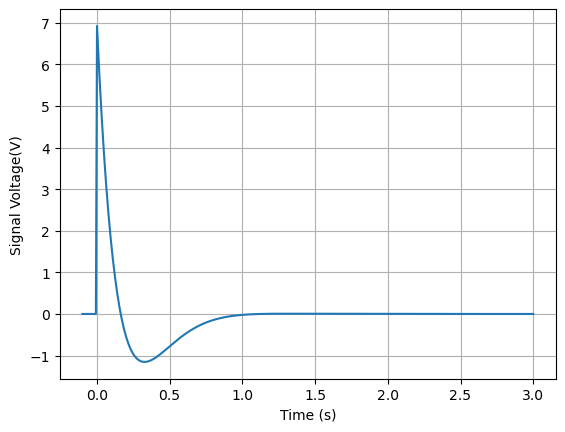

In [14]:
tv = linspace(-.1, 3, 400)
qt.plot(tv,ylabel='Signal Voltage(V)')

This is now the step response of a second order high pass filter.